Evaluating BFS, DFS, UCS, Iterative Deepening, Bidirectional Search, Greedy, and A* Search algorithms using the graph from Question 2 and benchmarking them. 
    - The benchmark should be finding the path between each node. Randomly pick 10 cities. Find the path between them.

For each algorithm :
- What is the average time taken for each path search?
- What is the solution length?

Each experiment should be run 10 times


In [ ]:

from random import sample
from Searches import Search
from undirectedGraph import Graph
from romaniaCity import Romania
from time import perf_counter as prf_ctr
from matplotlib import pyplot as plt


romania = Romania()
romania_graph: Graph = romania.get_city()
romania_coordinates = romania.get_coordinates()
search = Search()

cities_list = list(romania_graph.get_nodes().keys())
search_algorithms = ["A*", "bfs", "bidirectional", "dijkstra", "ucs", "ids", "dfs", "greedy"] # type: ignore
search_runtime = [0.0 for _ in range(8)]
search_solution_length = [0.0 for _ in range(8)]

randomlist = sample(cities_list, 10)
NUMBER_OF_EXPERIMENTS = 10
# run the experiment 10 times
for _ in range(NUMBER_OF_EXPERIMENTS):
    # choosing randomly between cities
    for start in randomlist:
        for goal in randomlist:
            if start == goal:
                continue

            ## a_start_search
            start_timer = prf_ctr()
            solution = search.a_star_search(romania_graph, start, goal, romania_coordinates)
            end_timer = prf_ctr()
            search_runtime[0] += (end_timer - start_timer)
            search_solution_length[0] += len(solution)

            ## breadth first search
            start_timer = prf_ctr()
            solution = search.bfs(romania_graph, start, goal)
            end_timer = prf_ctr()
            search_runtime[1] += (end_timer - start_timer)
            search_solution_length[1] += len(solution)
        
            ## dijkstra first search
            start_timer = prf_ctr()
            solution = search.dijkstra_search(romania_graph, start, goal)
            end_timer = prf_ctr()
            search_runtime[2] += (end_timer - start_timer)
            search_solution_length[2] += len(solution)

            ## ucs first search
            start_timer = prf_ctr()
            solution = search.ucs(romania_graph, start, goal)
            end_timer = prf_ctr()
            search_runtime[3] += (end_timer - start_timer)
            search_solution_length[3] += len(solution)
            
            ## ids first search
            start_timer = prf_ctr()
            solution = search.ids(romania_graph, start, goal)
            end_timer = prf_ctr()
            search_runtime[4] += (end_timer - start_timer)
            search_solution_length[4] += len(solution)

            ## dfs first search
            start_timer = prf_ctr()
            solution = search.dfs_iterative(romania_graph, start, goal)
            end_timer = prf_ctr()
            search_runtime[5] += (end_timer - start_timer)
            search_solution_length[5] += len(solution)

            ## greedy first search
            start_timer = prf_ctr()
            solution = search.greedy_search(romania_graph, start, goal)
            end_timer = prf_ctr()
            search_runtime[6] += (end_timer - start_timer)
            search_solution_length[6] += len(solution)

            ## bidirectional search search
            start_timer = prf_ctr()
            solution = search.bidirectional_search(romania_graph, start, goal)
            end_timer = prf_ctr()
            search_runtime[7] += (end_timer - start_timer)
            search_solution_length[7] += len(solution)


NUMBER_OF_PATHS = (8*(8-1))/2

for index in range(8):
    search_runtime[index] /= NUMBER_OF_PATHS + NUMBER_OF_EXPERIMENTS * 1000000
    search_solution_length[index] /= NUMBER_OF_PATHS + NUMBER_OF_EXPERIMENTS

plt.plot(search_algorithms, search_runtime)
plt.xlabel('Search algorithms') 
plt.ylabel('avg runtime (ms)') 
plt.title("Runtime Graph") 
plt.show()

plt.plot(search_algorithms, search_solution_length)
plt.xlabel('Search algorithms') 
plt.ylabel('Solution length') 
plt.title("Solution length Graph") 
plt.show()


- Create random graphs with a number of nodes 
`n = 10, 20, 30, 40` . Randomly connect nodes with the probability of edges 
`p = 0.2, 0.4, 0.6, 0.8 ` . In total, you will have 16 graphs. 

Randomly select five nodes and apply the above algorithms to find paths between them in all 16 graph settings. 
Register the time taken to find a solution for each algorithm and graph. Run each experiment 5 times and have the average of the time taken in the five experiments.

Use matplotlib.pyplot to plot their average time and solution length on each graph sizes

In [ ]:


# I have no idea what probability has to do with graph. : (

Compute the Degree, Closeness, Eigenvector, Katz, PageRank, and Betweenness centralities on the graph from Question 2. (You have to read online how to calculate these centralities). 

Compute these centralities for each node
Report a table containing top-ranked cities in each centrality category
Summarize your observations


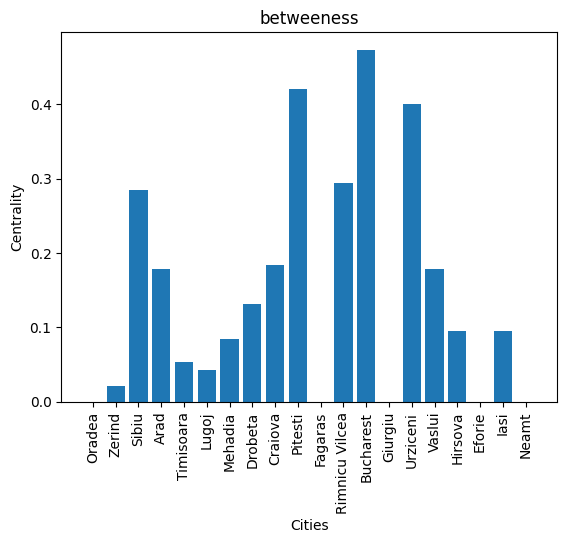

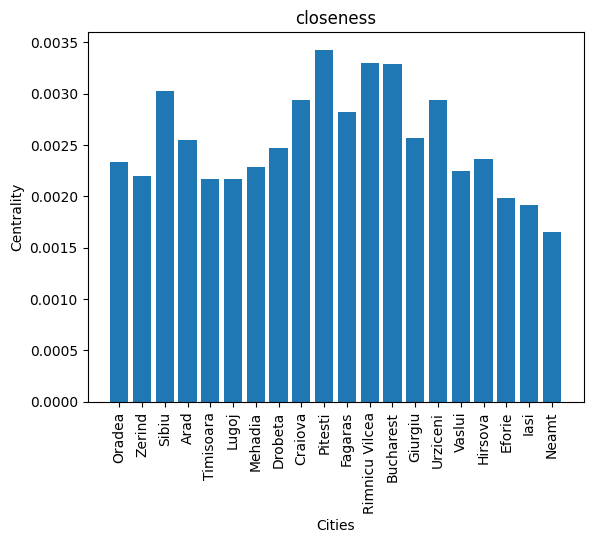

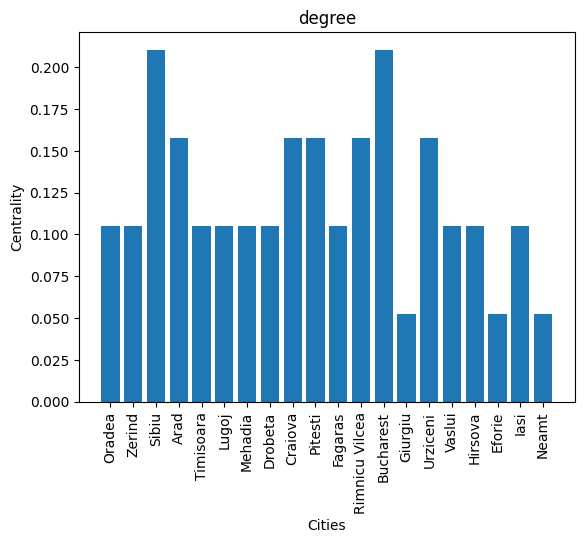

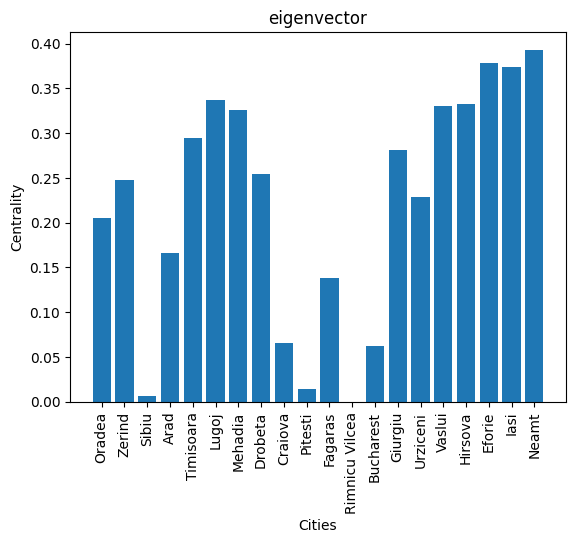

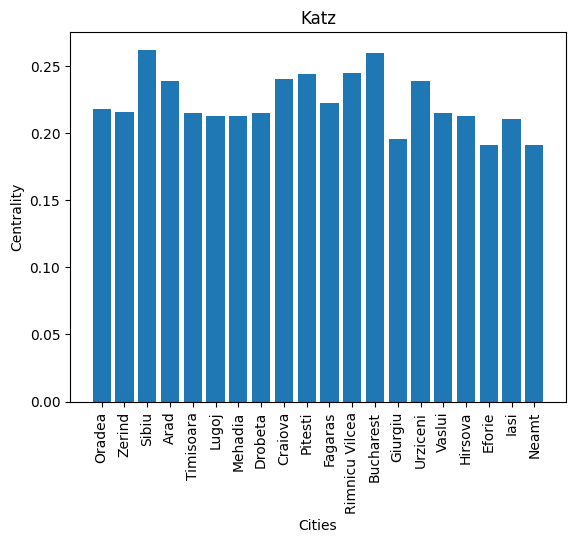

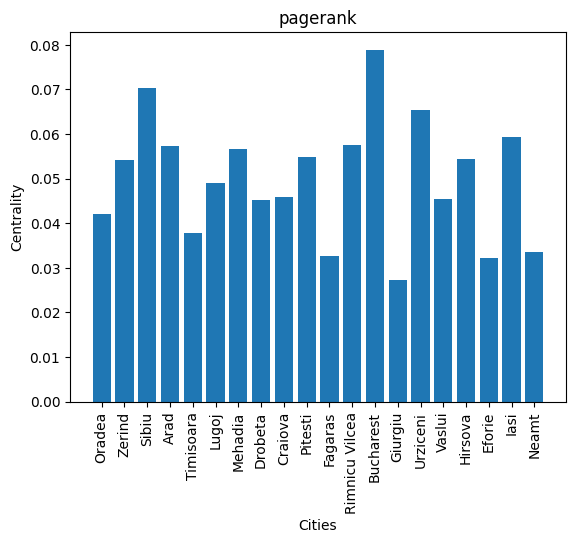

In [45]:
from typing import Dict, List, Mapping, Tuple
from undirectedGraph import Graph
from centrality import Centrality as center
from romaniaCity import Romania

# compute the centrality of every romainan city.
romania = Romania()
romania_graph: Graph = romania.get_city()
romania_coordinates = romania.get_coordinates()

betweeness_centrality = center().betweenness_centrality(romania_graph)
closeness_centrality = center().closeness_centrality(romania_graph)
degree_centrality = center().degree_centrality(romania_graph)
eigenvector_centrality = center().eigenvector_centrality(romania_graph)
katz_centrality = center().katz_centrality(romania_graph)
pagerank_centrality = center().pagerank_centrality(romania_graph)

centrality_list : List[Tuple[Mapping,str]] = [(betweeness_centrality, "betweeness"),\
                (closeness_centrality, "closeness"),(degree_centrality, "degree"),\
                (eigenvector_centrality, "eigenvector"), (katz_centrality, "Katz"),\
                (pagerank_centrality, "pagerank")]

x_labels = list(romania_graph.get_nodes())

for centrality in centrality_list:
    y_values = []

    centrality_dict, centrality_name = centrality

    for key in x_labels:
        y_values.append(centrality_dict[key])

    plt.bar(x_labels, y_values)
    plt.xticks(rotation=90)
    plt.xlabel('Cities') 
    plt.ylabel('Centrality')
    plt.title(centrality_name)
    plt.show()



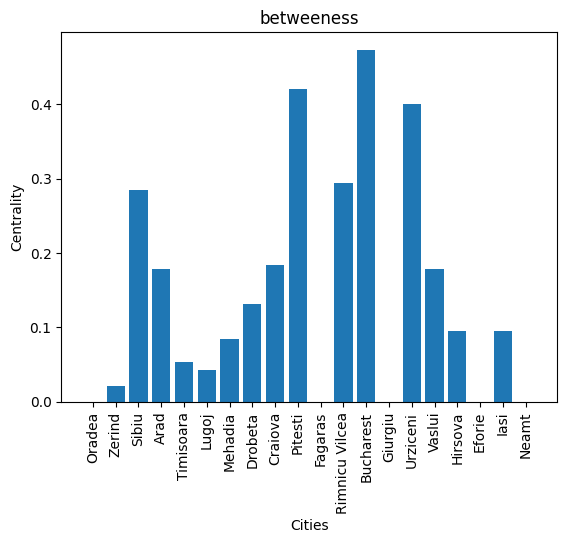

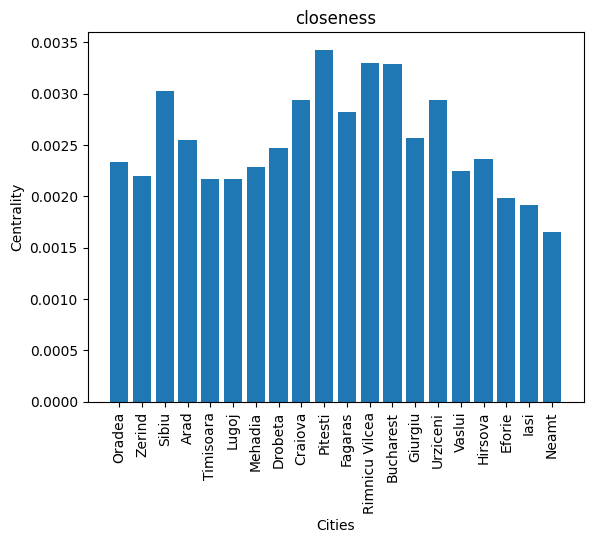

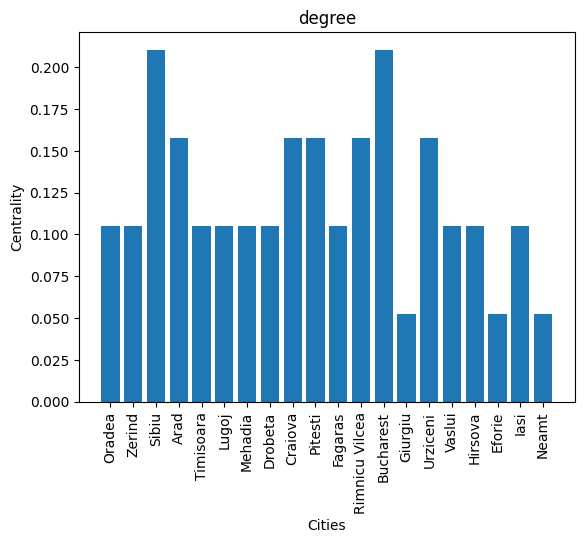

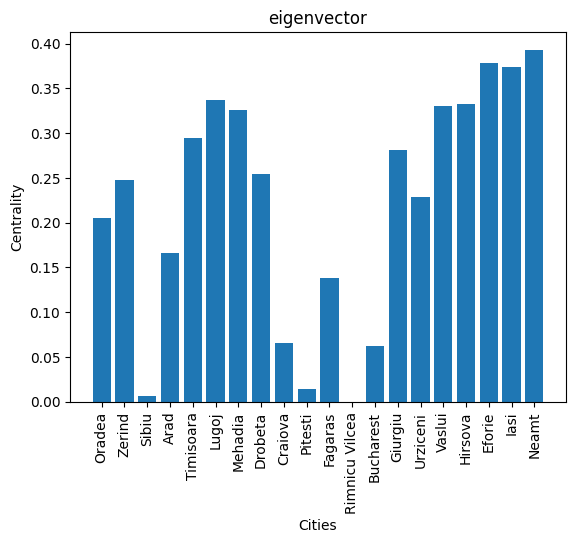

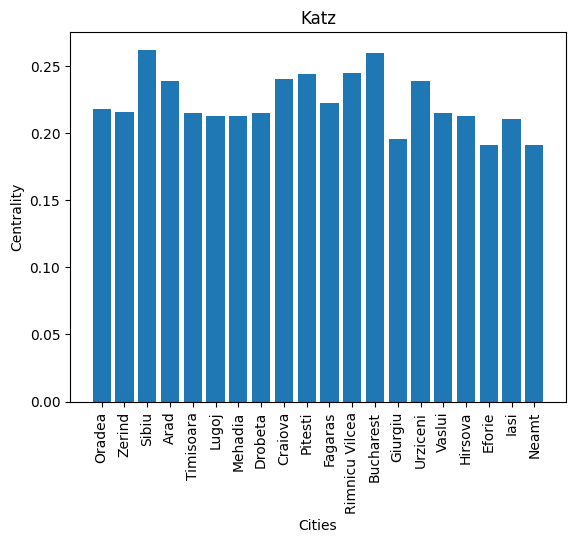

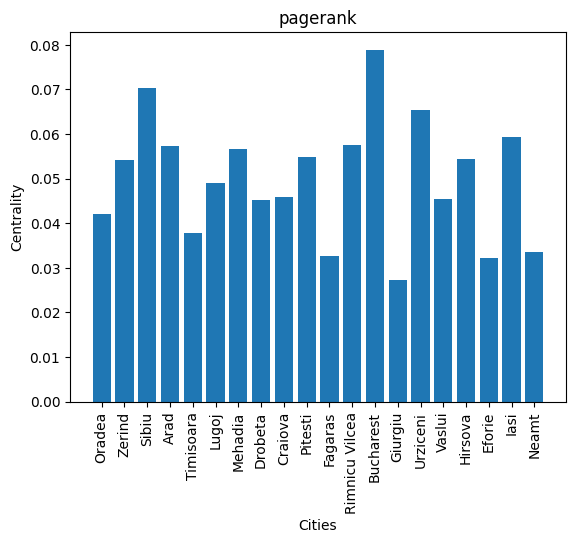

In [ ]:
from typing import Dict, List, Mapping, Tuple
from undirectedGraph import Graph
from centrality import Centrality as center
from romaniaCity import Romania

# compute the centrality of every romainan city.
romania = Romania()
romania_graph: Graph = romania.get_city()
romania_coordinates = romania.get_coordinates()

betweeness_centrality = center().betweenness_centrality(romania_graph)
closeness_centrality = center().closeness_centrality(romania_graph)
degree_centrality = center().degree_centrality(romania_graph)
eigenvector_centrality = center().eigenvector_centrality(romania_graph)
katz_centrality = center().katz_centrality(romania_graph)
pagerank_centrality = center().pagerank_centrality(romania_graph)

centrality_list : List[Tuple[Mapping,str]] = [(betweeness_centrality, "betweeness"),\
                (closeness_centrality, "closeness"),(degree_centrality, "degree"),\
                (eigenvector_centrality, "eigenvector"), (katz_centrality, "Katz"),\
                (pagerank_centrality, "pagerank")]

x_labels = list(romania_graph.get_nodes())

for centrality in centrality_list:
    y_values = []

    centrality_dict, centrality_name = centrality

    for key in x_labels:
        y_values.append(centrality_dict[key])

    plt.bar(x_labels, y_values)
    plt.xticks(rotation=90)
    plt.xlabel('Cities') 
    plt.ylabel('Centrality')
    plt.title(centrality_name)
    plt.show()



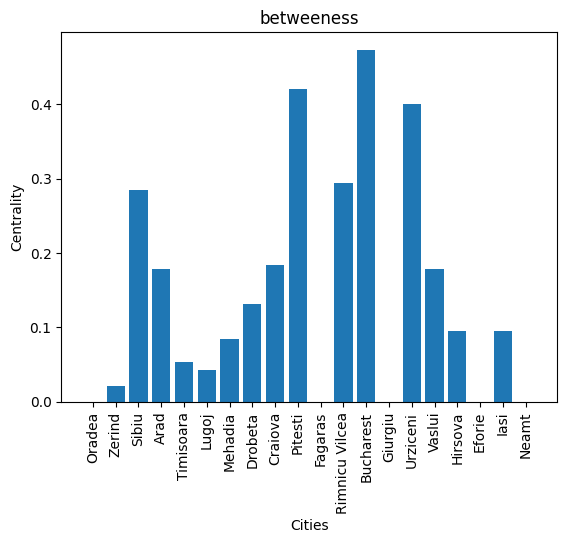

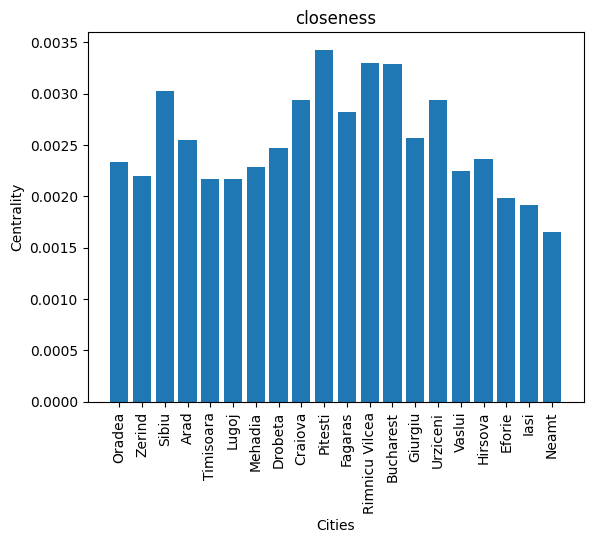

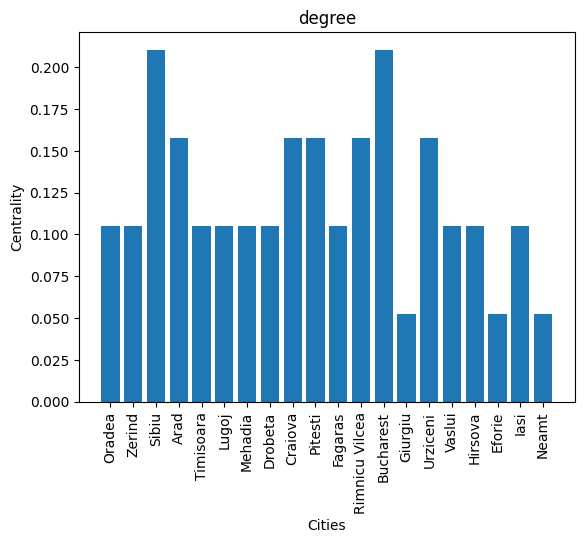

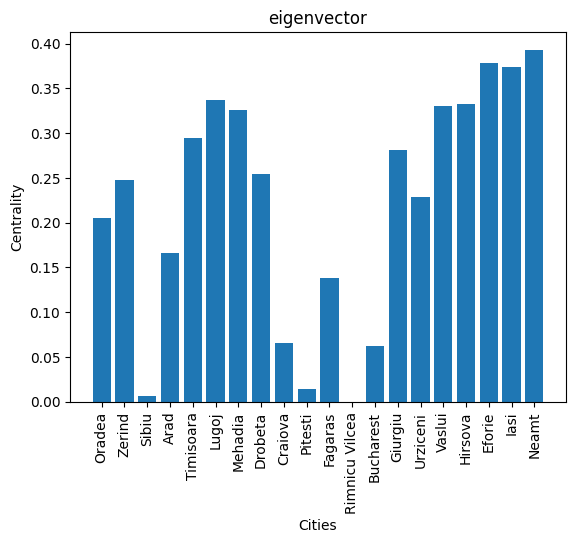

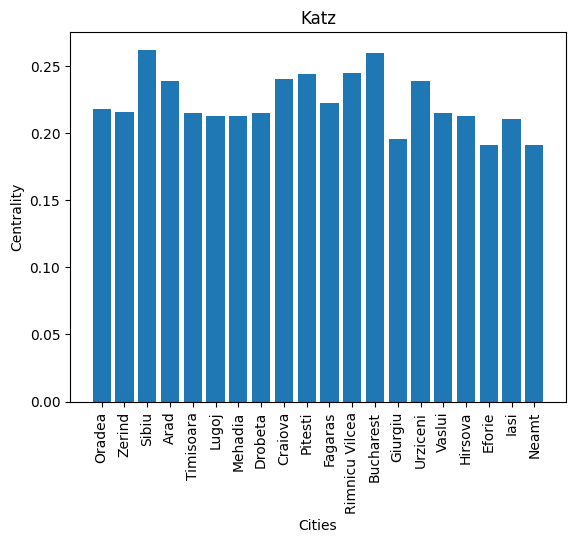

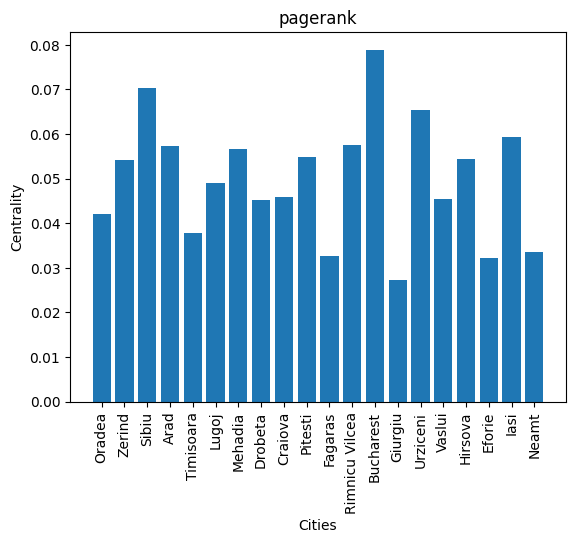

In [ ]:
from typing import Dict, List, Mapping, Tuple
from undirectedGraph import Graph
from centrality import Centrality as center
from romaniaCity import Romania

# compute the centrality of every romainan city.
romania = Romania()
romania_graph: Graph = romania.get_city()
romania_coordinates = romania.get_coordinates()

betweeness_centrality = center().betweenness_centrality(romania_graph)
closeness_centrality = center().closeness_centrality(romania_graph)
degree_centrality = center().degree_centrality(romania_graph)
eigenvector_centrality = center().eigenvector_centrality(romania_graph)
katz_centrality = center().katz_centrality(romania_graph)
pagerank_centrality = center().pagerank_centrality(romania_graph)

centrality_list : List[Tuple[Mapping,str]] = [(betweeness_centrality, "betweeness"),\
                (closeness_centrality, "closeness"),(degree_centrality, "degree"),\
                (eigenvector_centrality, "eigenvector"), (katz_centrality, "Katz"),\
                (pagerank_centrality, "pagerank")]

x_labels = list(romania_graph.get_nodes())

for centrality in centrality_list:
    y_values = []

    centrality_dict, centrality_name = centrality

    for key in x_labels:
        y_values.append(centrality_dict[key])

    plt.bar(x_labels, y_values)
    plt.xticks(rotation=90)
    plt.xlabel('Cities') 
    plt.ylabel('Centrality')
    plt.title(centrality_name)
    plt.show()



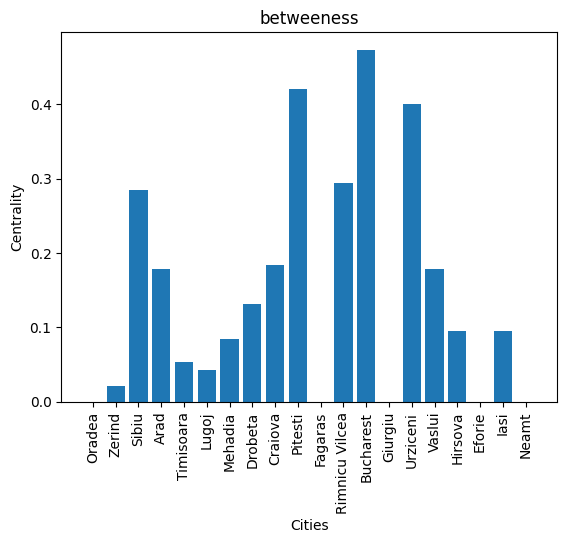

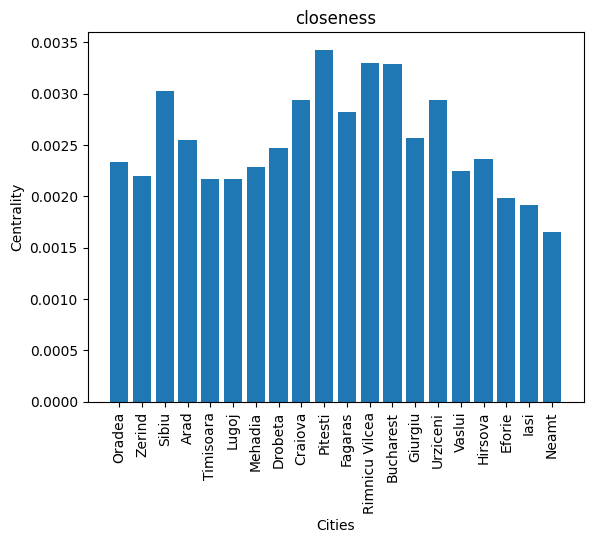

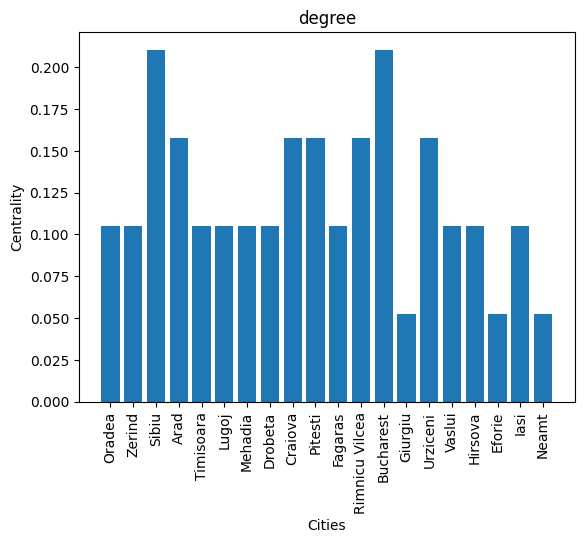

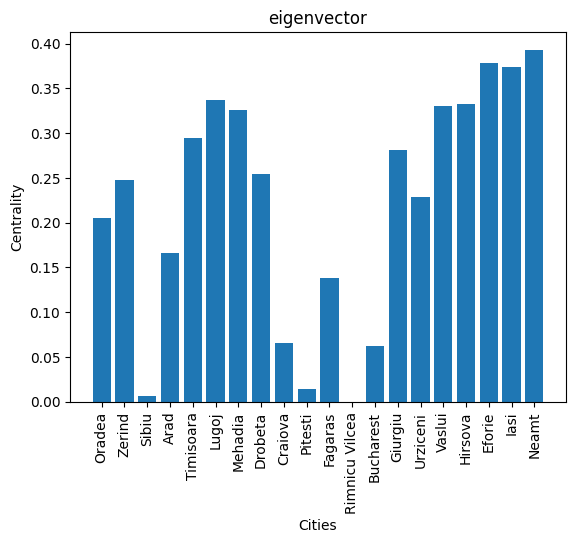

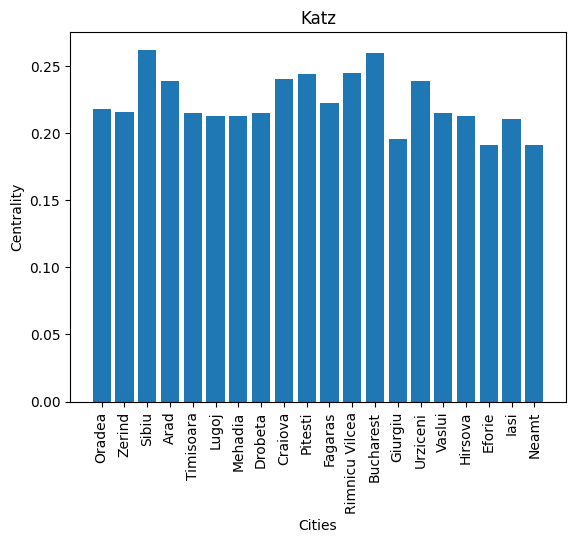

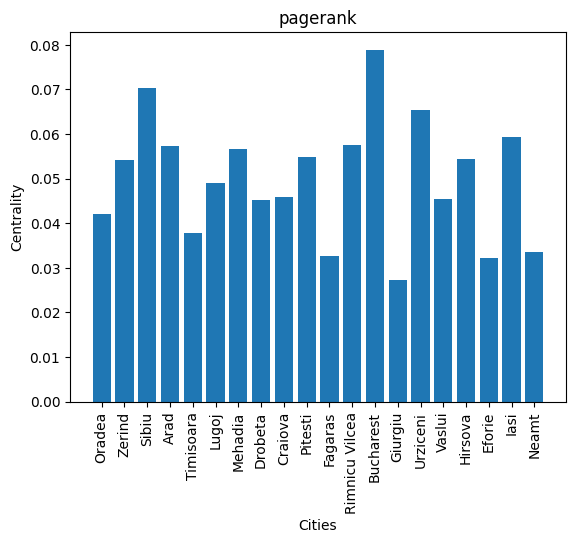

In [ ]:
from typing import Dict, List, Mapping, Tuple
from undirectedGraph import Graph
from centrality import Centrality as center
from romaniaCity import Romania

# compute the centrality of every romainan city.
romania = Romania()
romania_graph: Graph = romania.get_city()
romania_coordinates = romania.get_coordinates()

betweeness_centrality = center().betweenness_centrality(romania_graph)
closeness_centrality = center().closeness_centrality(romania_graph)
degree_centrality = center().degree_centrality(romania_graph)
eigenvector_centrality = center().eigenvector_centrality(romania_graph)
katz_centrality = center().katz_centrality(romania_graph)
pagerank_centrality = center().pagerank_centrality(romania_graph)

centrality_list : List[Tuple[Mapping,str]] = [(betweeness_centrality, "betweeness"),\
                (closeness_centrality, "closeness"),(degree_centrality, "degree"),\
                (eigenvector_centrality, "eigenvector"), (katz_centrality, "Katz"),\
                (pagerank_centrality, "pagerank")]

x_labels = list(romania_graph.get_nodes())

for centrality in centrality_list:
    y_values = []

    centrality_dict, centrality_name = centrality

    for key in x_labels:
        y_values.append(centrality_dict[key])

    plt.bar(x_labels, y_values)
    plt.xticks(rotation=90)
    plt.xlabel('Cities') 
    plt.ylabel('Centrality')
    plt.title(centrality_name)
    plt.show()



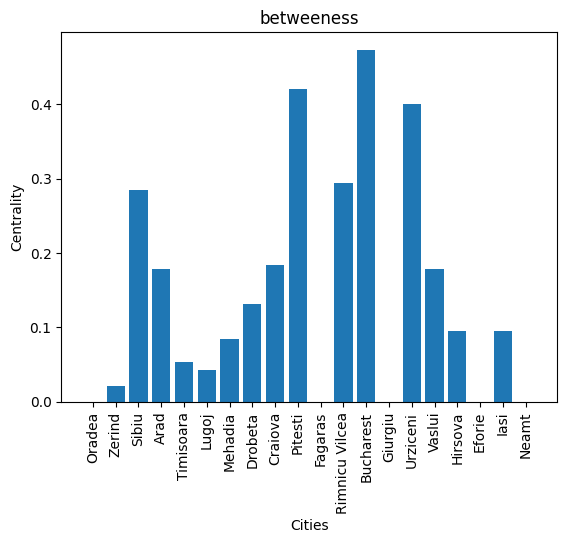

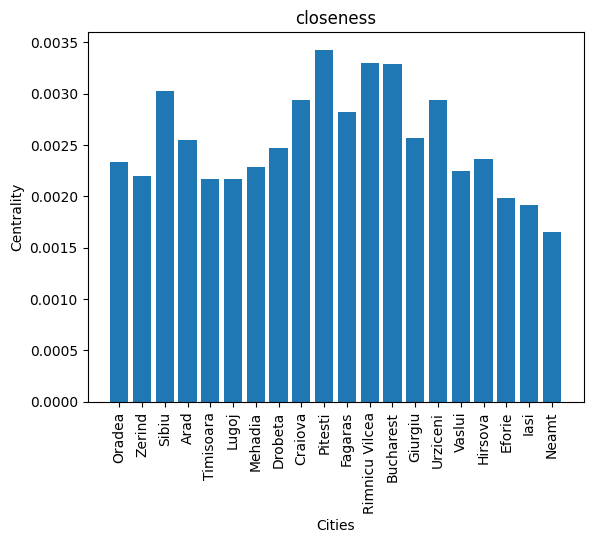

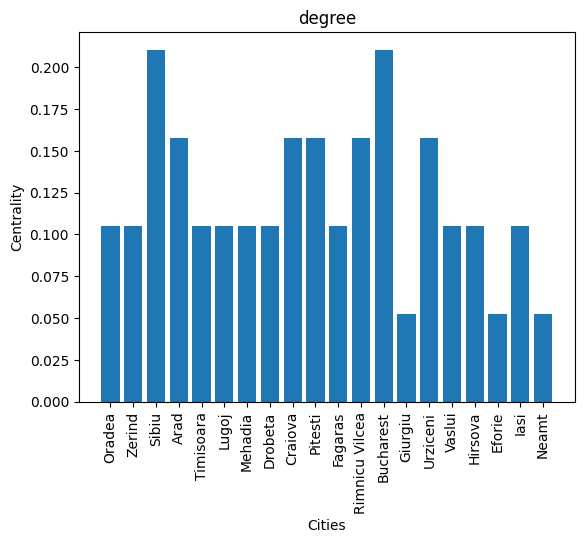

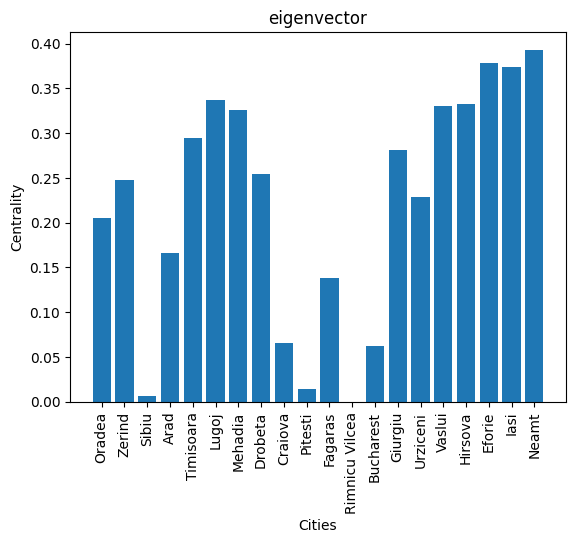

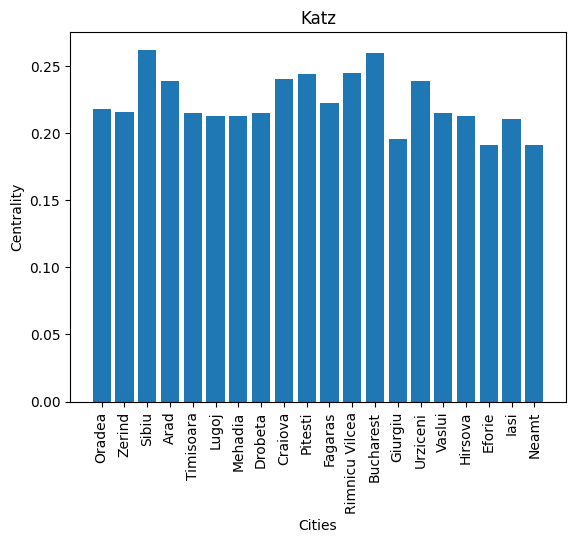

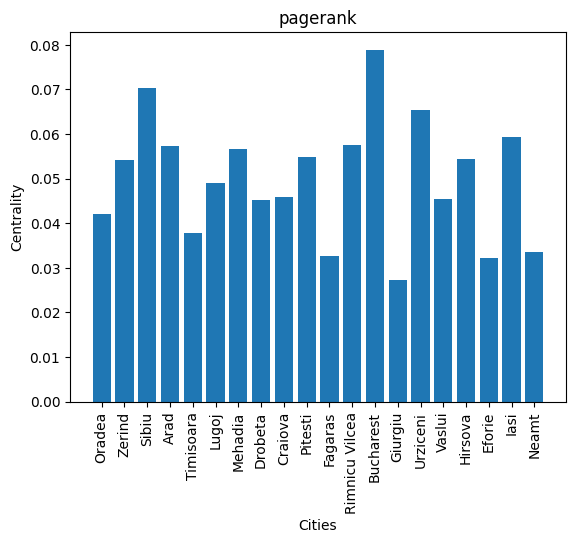

In [ ]:
from typing import Dict, List, Mapping, Tuple
from undirectedGraph import Graph
from centrality import Centrality as center
from romaniaCity import Romania

# compute the centrality of every romainan city.
romania = Romania()
romania_graph: Graph = romania.get_city()
romania_coordinates = romania.get_coordinates()

betweeness_centrality = center().betweenness_centrality(romania_graph)
closeness_centrality = center().closeness_centrality(romania_graph)
degree_centrality = center().degree_centrality(romania_graph)
eigenvector_centrality = center().eigenvector_centrality(romania_graph)
katz_centrality = center().katz_centrality(romania_graph)
pagerank_centrality = center().pagerank_centrality(romania_graph)

centrality_list : List[Tuple[Mapping,str]] = [(betweeness_centrality, "betweeness"),\
                (closeness_centrality, "closeness"),(degree_centrality, "degree"),\
                (eigenvector_centrality, "eigenvector"), (katz_centrality, "Katz"),\
                (pagerank_centrality, "pagerank")]

x_labels = list(romania_graph.get_nodes())

for centrality in centrality_list:
    y_values = []

    centrality_dict, centrality_name = centrality

    for key in x_labels:
        y_values.append(centrality_dict[key])

    plt.bar(x_labels, y_values)
    plt.xticks(rotation=90)
    plt.xlabel('Cities') 
    plt.ylabel('Centrality')
    plt.title(centrality_name)
    plt.show()



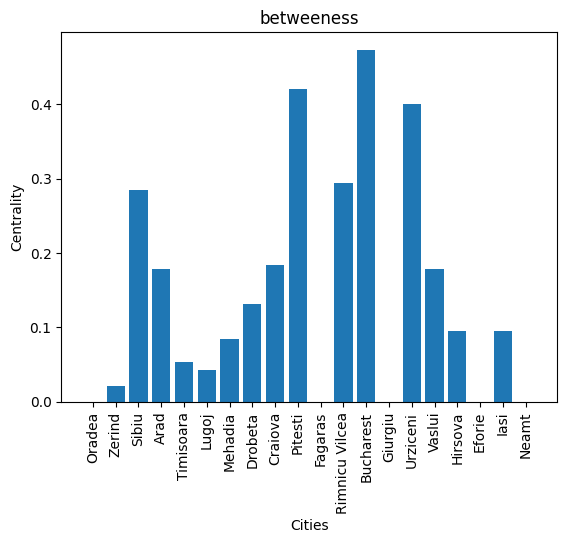

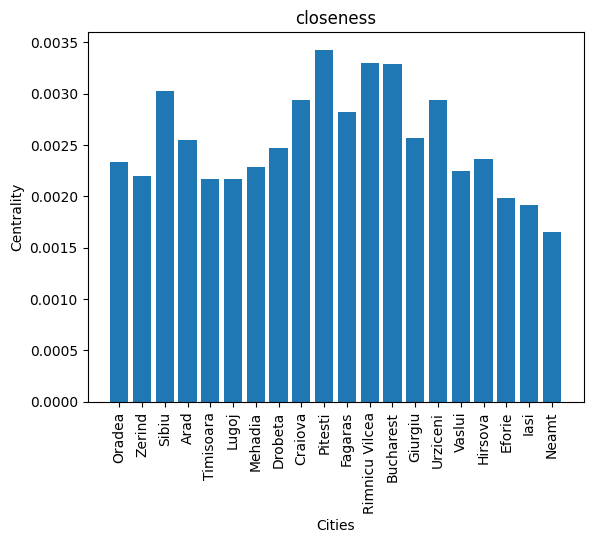

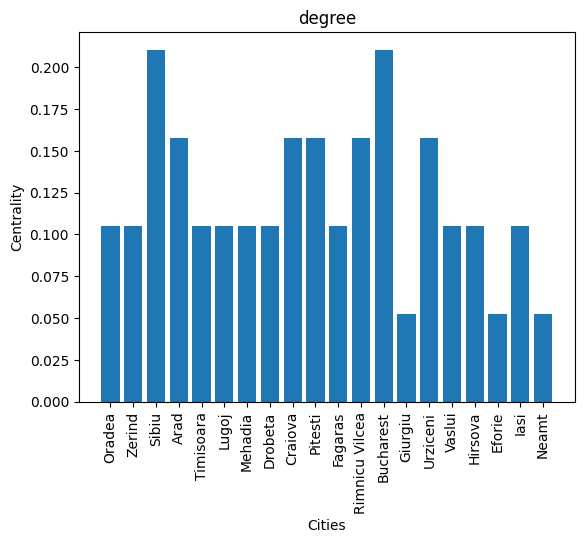

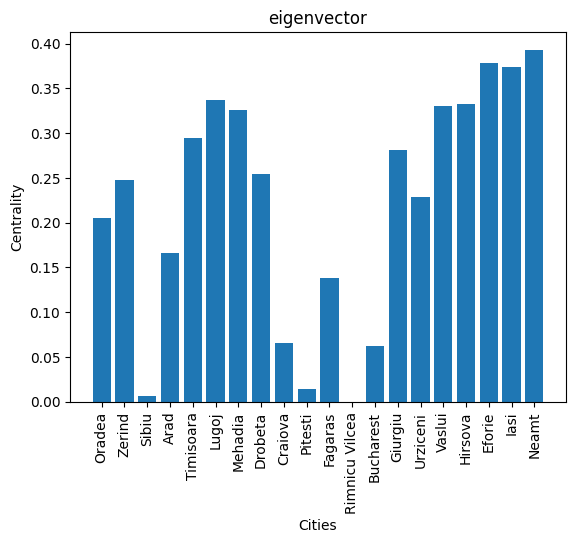

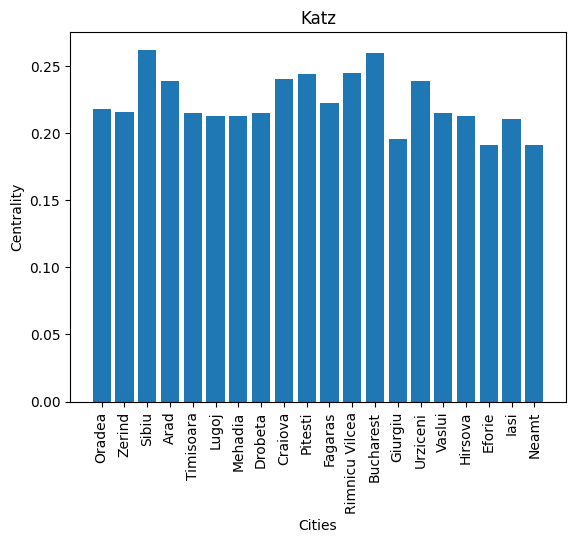

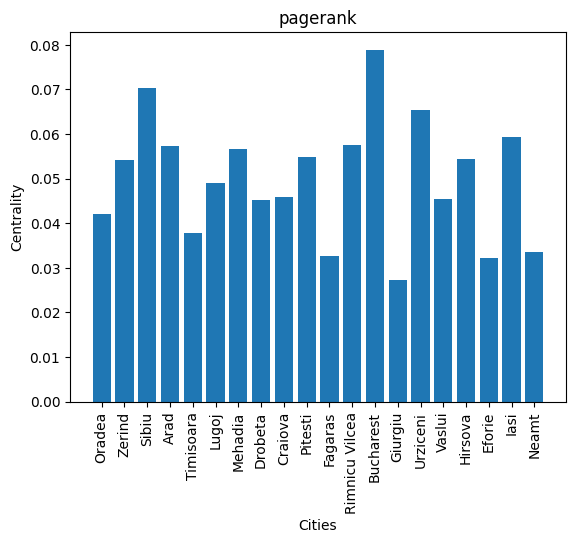

In [ ]:
from typing import Dict, List, Mapping, Tuple
from undirectedGraph import Graph
from centrality import Centrality as center
from romaniaCity import Romania

# compute the centrality of every romainan city.
romania = Romania()
romania_graph: Graph = romania.get_city()
romania_coordinates = romania.get_coordinates()

betweeness_centrality = center().betweenness_centrality(romania_graph)
closeness_centrality = center().closeness_centrality(romania_graph)
degree_centrality = center().degree_centrality(romania_graph)
eigenvector_centrality = center().eigenvector_centrality(romania_graph)
katz_centrality = center().katz_centrality(romania_graph)
pagerank_centrality = center().pagerank_centrality(romania_graph)

centrality_list : List[Tuple[Mapping,str]] = [(betweeness_centrality, "betweeness"),\
                (closeness_centrality, "closeness"),(degree_centrality, "degree"),\
                (eigenvector_centrality, "eigenvector"), (katz_centrality, "Katz"),\
                (pagerank_centrality, "pagerank")]

x_labels = list(romania_graph.get_nodes())

for centrality in centrality_list:
    y_values = []

    centrality_dict, centrality_name = centrality

    for key in x_labels:
        y_values.append(centrality_dict[key])

    plt.bar(x_labels, y_values)
    plt.xticks(rotation=90)
    plt.xlabel('Cities') 
    plt.ylabel('Centrality')
    plt.title(centrality_name)
    plt.show()



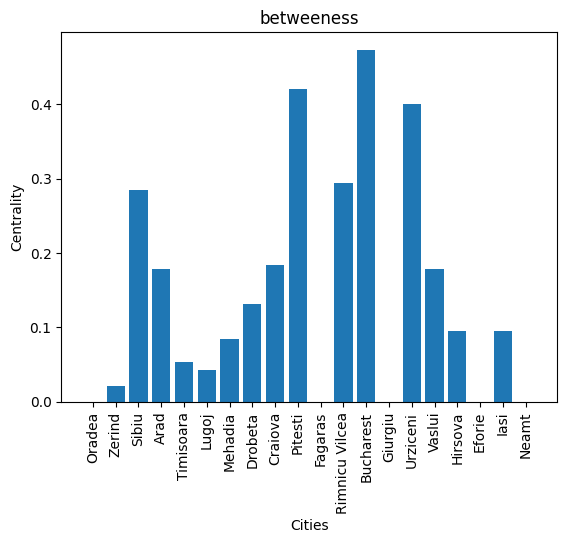

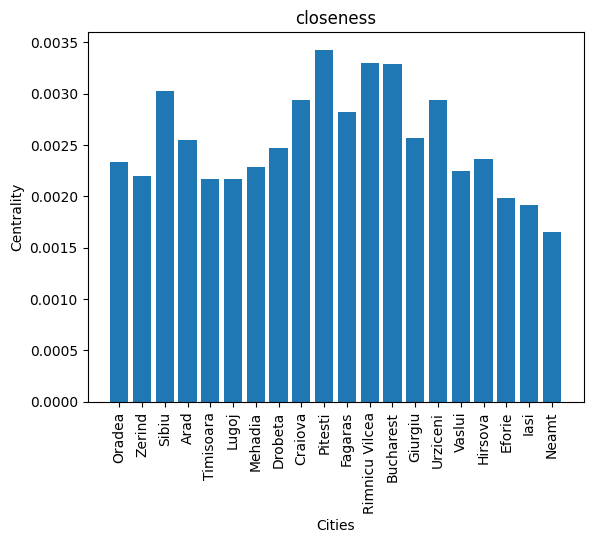

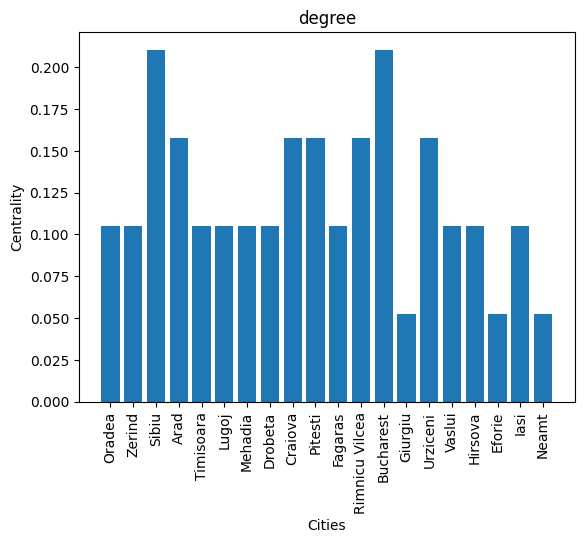

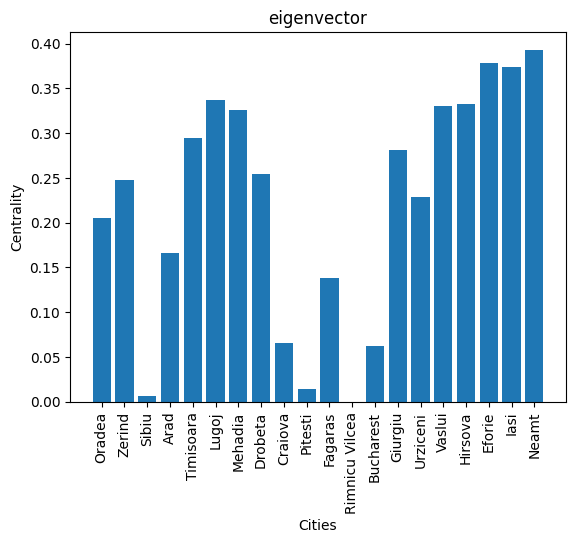

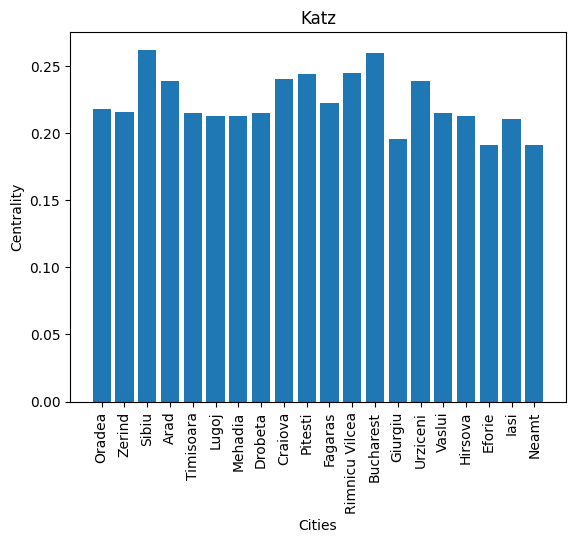

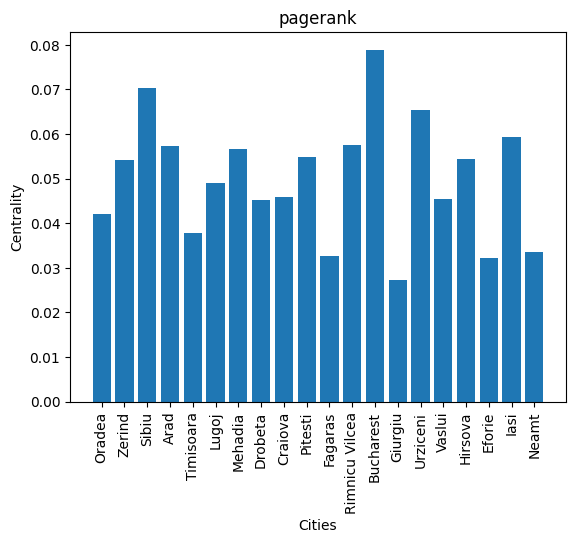

In [ ]:
from typing import Dict, List, Mapping, Tuple
from undirectedGraph import Graph
from centrality import Centrality as center
from romaniaCity import Romania

# compute the centrality of every romainan city.
romania = Romania()
romania_graph: Graph = romania.get_city()
romania_coordinates = romania.get_coordinates()

betweeness_centrality = center().betweenness_centrality(romania_graph)
closeness_centrality = center().closeness_centrality(romania_graph)
degree_centrality = center().degree_centrality(romania_graph)
eigenvector_centrality = center().eigenvector_centrality(romania_graph)
katz_centrality = center().katz_centrality(romania_graph)
pagerank_centrality = center().pagerank_centrality(romania_graph)

centrality_list : List[Tuple[Mapping,str]] = [(betweeness_centrality, "betweeness"),\
                (closeness_centrality, "closeness"),(degree_centrality, "degree"),\
                (eigenvector_centrality, "eigenvector"), (katz_centrality, "Katz"),\
                (pagerank_centrality, "pagerank")]

x_labels = list(romania_graph.get_nodes())

for centrality in centrality_list:
    y_values = []

    centrality_dict, centrality_name = centrality

    for key in x_labels:
        y_values.append(centrality_dict[key])

    plt.bar(x_labels, y_values)
    plt.xticks(rotation=90)
    plt.xlabel('Cities') 
    plt.ylabel('Centrality')
    plt.title(centrality_name)
    plt.show()



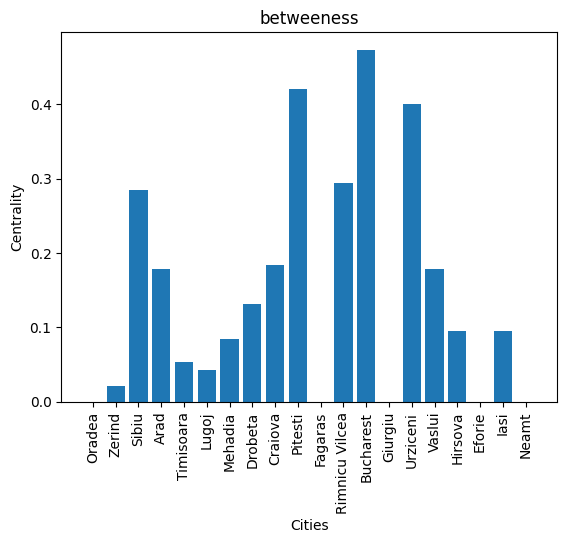

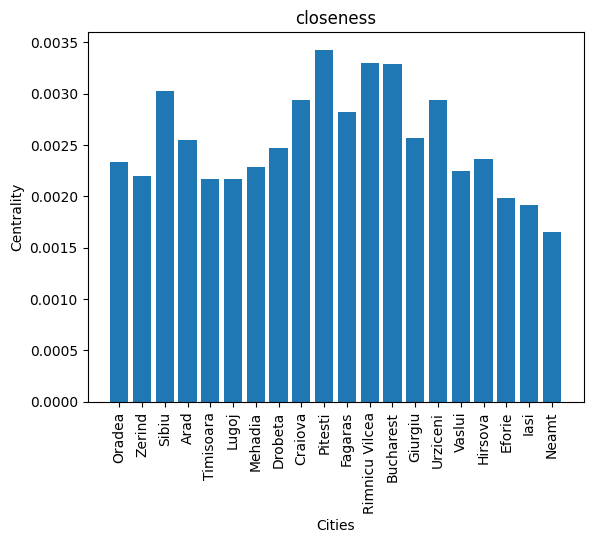

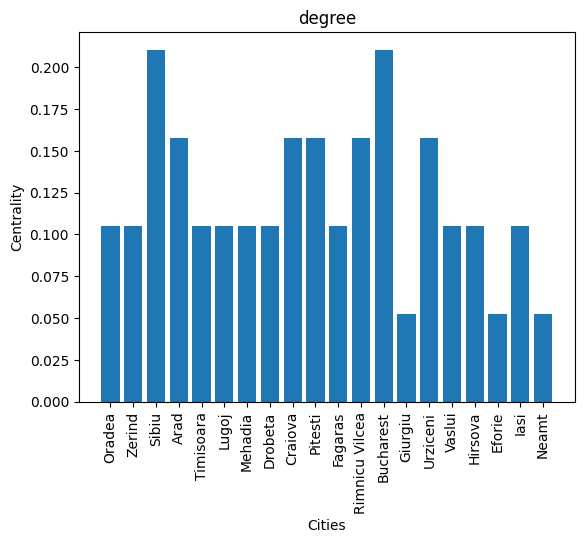

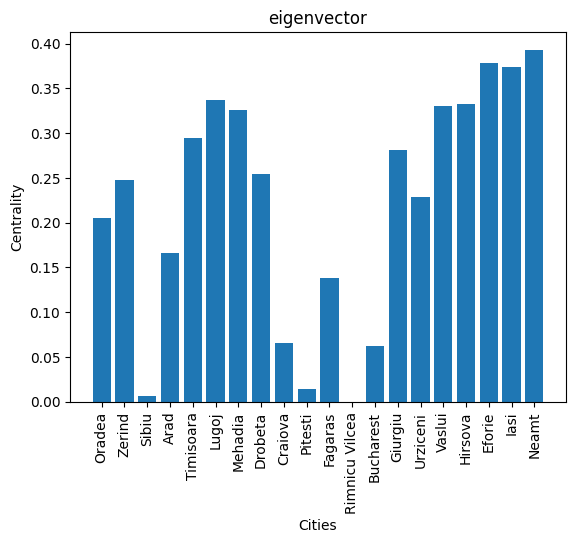

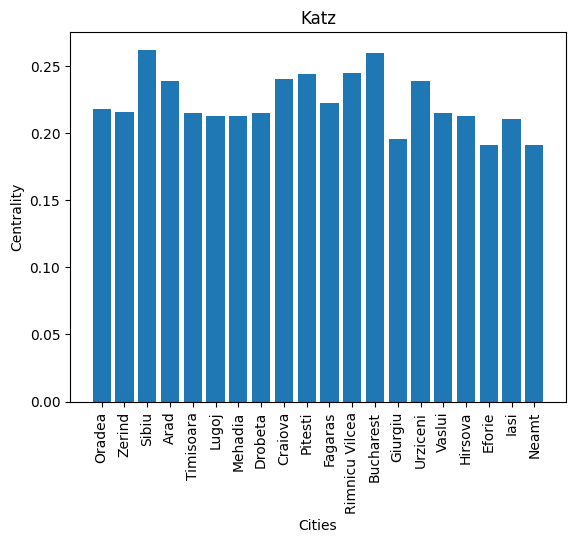

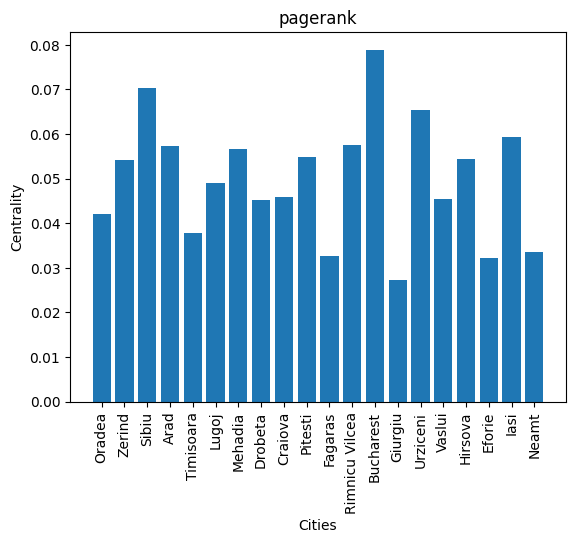

In [ ]:
from typing import Dict, List, Mapping, Tuple
from undirectedGraph import Graph
from centrality import Centrality as center
from romaniaCity import Romania

# compute the centrality of every romainan city.
romania = Romania()
romania_graph: Graph = romania.get_city()
romania_coordinates = romania.get_coordinates()

betweeness_centrality = center().betweenness_centrality(romania_graph)
closeness_centrality = center().closeness_centrality(romania_graph)
degree_centrality = center().degree_centrality(romania_graph)
eigenvector_centrality = center().eigenvector_centrality(romania_graph)
katz_centrality = center().katz_centrality(romania_graph)
pagerank_centrality = center().pagerank_centrality(romania_graph)

centrality_list : List[Tuple[Mapping,str]] = [(betweeness_centrality, "betweeness"),\
                (closeness_centrality, "closeness"),(degree_centrality, "degree"),\
                (eigenvector_centrality, "eigenvector"), (katz_centrality, "Katz"),\
                (pagerank_centrality, "pagerank")]

x_labels = list(romania_graph.get_nodes())

for centrality in centrality_list:
    y_values = []

    centrality_dict, centrality_name = centrality

    for key in x_labels:
        y_values.append(centrality_dict[key])

    plt.bar(x_labels, y_values)
    plt.xticks(rotation=90)
    plt.xlabel('Cities') 
    plt.ylabel('Centrality')
    plt.title(centrality_name)
    plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data to plot
x = np.arange(0, 10, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a figure and two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first graph in the first subplot
axs[0].plot(x, y1)
axs[0].set_title('Sin(x)')

# Plot the second graph in the second subplot
axs[1].plot(x, y2)
axs[1].set_title('Cos(x)')

# Show the plot
plt.show()
